**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de la [competencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker).
Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [30]:
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import numpy

import seaborn as sns

sns.set_context('talk')

In [31]:
import plotly

# Make sure it's 4.14.3
plotly.__version__

'4.11.0'

In [32]:
# To update plotly, uncomment and run the following line:
# !pip install plotly --upgrade

In [33]:
melb_df = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')

melb_df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


#### Breve estudio del dataset

In [152]:
melb_df.shape

(13580, 21)

In [35]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [36]:
melb_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## Ejercicio 1: 

1. Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Investigar la distribución de las variables del conjunto de datos, y seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad.
    1. Justificar cada columna no seleccionada.
    2. Para las variables categóricas seleccionadas, agrupe o combine las categorías poco frecuentes para asegurar que todos los grupos tengan un número mínimo de registros.

3. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico.
    1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
    2. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
    3. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

### Ejercicio 1.1

In [37]:
# Métricas de la distribución de la variable Price
print(f'Media: {melb_df.Price.mean()}')
print(f'Máximo: {melb_df.Price.max()}')
print(f'Mínimo: {melb_df.Price.min()}')

Media: 1075684.079455081
Máximo: 9000000.0
Mínimo: 85000.0


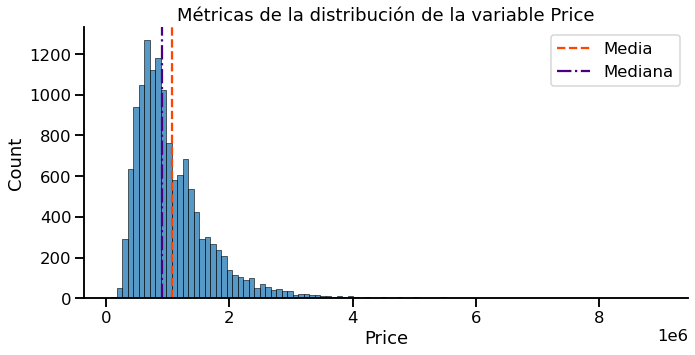

In [38]:
sns.displot(melb_df.Price, bins=100, aspect=2)

plt.title("Métricas de la distribución de la variable Price")
plt.axvline(melb_df.Price.mean(), color='orangered', linestyle='--', label='Media')
plt.axvline(melb_df.Price.median(), color='indigo', linestyle='-.', label='Mediana')

plt.legend();

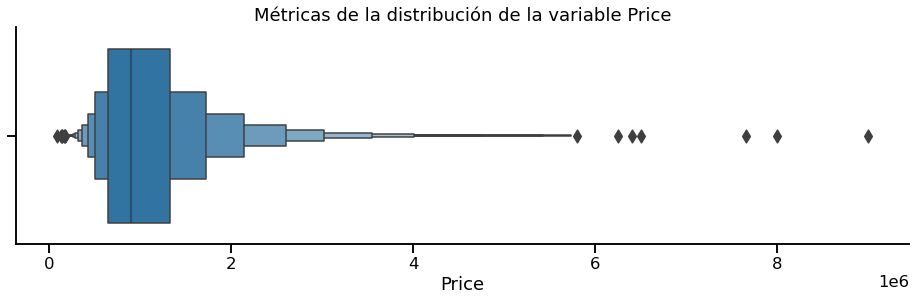

In [39]:
plt.figure(figsize=(16, 4))
plt.title("Métricas de la distribución de la variable Price")

sns.boxenplot(x=melb_df.Price)
sns.despine()

**Respuesta**

En esta instancia, donde aún no hemos evaluado la capacidad de predicción de precios de nuestro modelo, consideramos que todos los datos de nuestro conjunto pueden llegar a ser relevantes.
Por lo tanto, no eliminaremos ningún valor hasta no tener cierto *feedback* de nuestro predictor.

De todas maneras, para resolver la consigna, podríamos aplicar una limpieza a la columna `Price` para eliminar los *outliers* de ambos extremos.

In [40]:
def clean_outliers(dataset, column_name):
    """
    Returns dataset removing the outlier rows from column @column_name.
    """
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        # Diferencia con la media es menor a 2.5 veces la desviación estándar.
        numpy.abs(interesting_col - interesting_col.mean()) <= (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

In [41]:
# Eliminamos los outliers de ambos extremos de la distribución
data = clean_outliers(melb_df, 'Price')

In [42]:
# Métricas de la distribución de la variable Price
print(f'Media: {data.Price.mean()}')
print(f'Máximo: {data.Price.max()}')
print(f'Mínimo: {data.Price.min()}')

Media: 1010122.9111901878
Máximo: 2670000.0
Mínimo: 85000.0


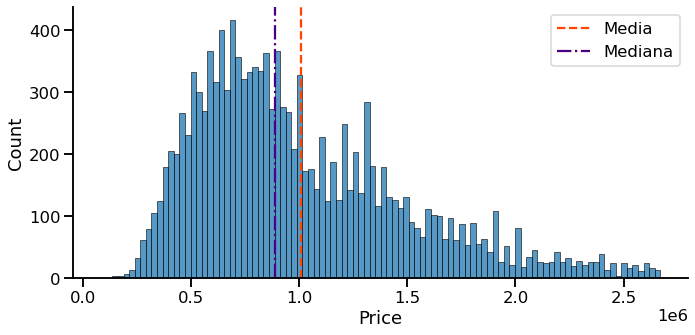

In [43]:
sns.displot(data.Price, bins=100, aspect=2)

plt.axvline(data.Price.mean(), color='orangered', linestyle='--', label='Media')
plt.axvline(data.Price.median(), color='indigo', linestyle='-.', label='Mediana')

plt.legend();

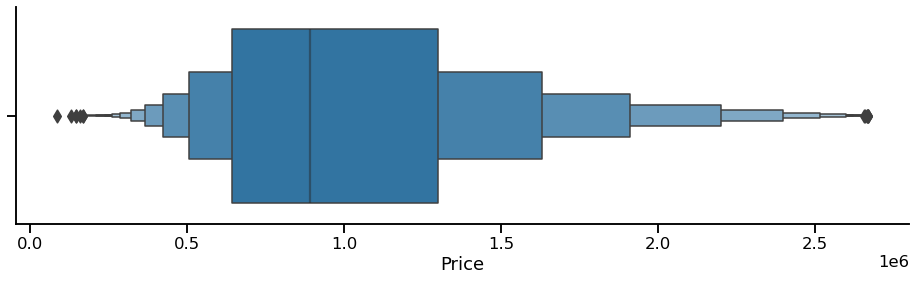

In [44]:
plt.figure(figsize=(16, 4))

sns.boxenplot(x=data.Price)
sns.despine()

### Ejercicio 1.2

In [45]:
# Averiguamos la cantidad de NaNs en nuestro dataset
cols = melb_df.isna().sum()

cols[cols > 0]

Car               62
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
dtype: int64

In [46]:
# Averiguamos la cantidad de 0s en nuestro dataset
cols = melb_df[melb_df == 0].count(axis=0)

cols[cols > 0]

Distance           6
Bedroom2          16
Bathroom          34
Car             1026
Landsize        1939
BuildingArea      17
dtype: int64

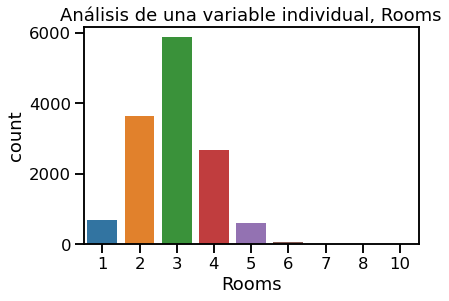

In [47]:
# Análisis de una variable individual, Rooms
plt.title("Análisis de una variable individual, Rooms")
sns.countplot(x=melb_df.Rooms);

### Análisis de Variables

Se realizó un breve análisis para cada una de las variables de nuestro dataset.
Para evitar que la notebook sea demasiado extensa, a continuación detallamos un resumen con las conclusiones obtenidas en el análisis.

**Categóricas**

- `Suburb` Barrio de residencia.
  Hay 314 valores únicos, de los cuales 21 solo poseen una sola propiedad.
  La variable será utilizada para imputar los datos faltantes de suburbios.
- `Type` Tipo de la propiedad.
  En orden de cantidad de ocurrencias, *house*, *unit*, y *townhouse*.
- `Address` Dirección de la propiedad.
  La categoría no aporta demasiada información, ya que la mayoría de los valores son únicos.
  Sería más informativa si solo clasificara la calle de residencia (sin incluir la altura).
  De todas maneras, consideramos que la dirección no es lo suficientemente útil para predecir el precio de una propiedad (en comparación al suburbio, por ejemplo), por lo que **no** será seleccionada.
- `Method` Forma de adquisión de la propiedad.
  En orden de cantidad de ocurrencias, *property sold*, *property sold prior*, *property passed in*, *vendor bid*, y *sold after auction*.
  La última categoría tiene muy pocos valores, pero no se puede agrupar con ningún otra ya que es la única.
- `Regionname` Región general de la propiedad.
  Se pueden separar en dos zonas, y ya que la zona de **Victoria** posee muy pocos datos, serán agrupados en una única categoría.
- `CouncilArea` Municipio (o algo similar a lo que entendemos).
  La variable tiene valores NaNs, que serán resueltos luego de aplicar un merge.
  Hay municipios con una cantidad menor a 10 propiedades, los cuales se podrían agrupar luego de imputar los valores faltantes.
- `Date` Fecha de venta de la propiedad.
  La variable no aporta demasiada información, ya que una fecha exacta no es tan informativa como un perído de tiempo.
  Se requiere de un procesamiento adicional de la variable, para poder separar las fechas en trimestres (en lugar de días).
- `SellerG` Vendedor de la propiedad.
  En total hay 268 vendedores distintos en el conjunto de datos, de los cuales 78 solo han vendido una única propiedad.
  Estos valores son candidatos a ser agrupados en una única categoría.

**Numéricas**

- `Price` Precio de la propiedad.
  La *media* es aproximadamente 1075000.
- `Distance` Distancia al centro.
  Hay valores con cero, pero serán considerados normales ya que es razonable vivir en el centro.
  La *media* es aproximadamente 10.
- `Propertycount` Cantidad de propiedades en el suburbio.
  La *media* es aproximadamente 7450.
- `Postcode` Código postal.
  Hay cerca de 200 valores únicos.
  Se aplicará un *merge* sobre la variable, contra la columna *zipcode* del otro conjunto de datos.
- `Rooms` Cantidad de habitaciones.
  Si fuese una variable categórica, se podrían agrupar todas las propiedades con 5 o más habitaciones.
- `Lattitude`: Latitud de ubicación.
- `Longtitude`: Longitud de ubicación.
- `BuildingArea` Tamaño de la edificación.
  La variable tiene 0s y NaNs entre sus valores, prácticamente el 50% de sus datos son *ruidosos*.
  Consideramos que la imputación de sus valores podría afectar negativamente la capacidad de predicción de nuestro modelo, por lo que **no** será seleccionada.
  La *media* es aproximadamente 150.
- `YearBuilt` Año de construcción.
  La variable tiene NaNs entre sus valores, prácticamente el 40% de sus datos son *ruidosos*.
  Consideramos que la imputación de sus valores podría afectar negativamente la capacidad de predicción de nuestro modelo, por lo que **no** será seleccionada.
  La *media* es aproximadamente 1965.
- `Bedroom2` Cantidad de dormitorios (obtenida a través de *web scraping*).
  La variable tiene 0s, podrían ser imputados ya que son pocos.
  Consideramos que la cantidad de dormitorios no aporta mucha más información que otras variables (como la cantidad de habitaciones, por ejemplo), por lo que **no** será seleccionada.
- `Bathroom` Cantidad de baños.
  La variable tiene 0s, los cuales serán imputados por el valor constante 1.
  Si fuese una variable categórica, se podrían agrupar todas las propiedades con 4 o más baños.
- `Car` Cantidad de cocheras.
  La variable tiene 0s, pero serán considerados normales ya que es razonable tener una propiedad sin conchera.
  La variable tiene NaNs, los cuales serán imputados por el valor constante 0.
  Si fuese una variable categórica, se podrían agrupar todas las propiedades con 5 o más cocheras.
- `Landsize` Tamaño del Terreno.
  La variable tiene 0s, que asumiremos normales ya que no todas las propiedades pueden tener patios.
  La *media* es aproximadamente 550.

In [153]:
# Copiamos nuestro dataset
df = melb_df.copy()

#### Eliminamos la variable `Address`

In [154]:
df.Address.nunique()

13378

In [50]:
df = df.drop(['Address'], axis=1)

#### Eliminamos las variables `BuildingArea` y `YearBuilt`

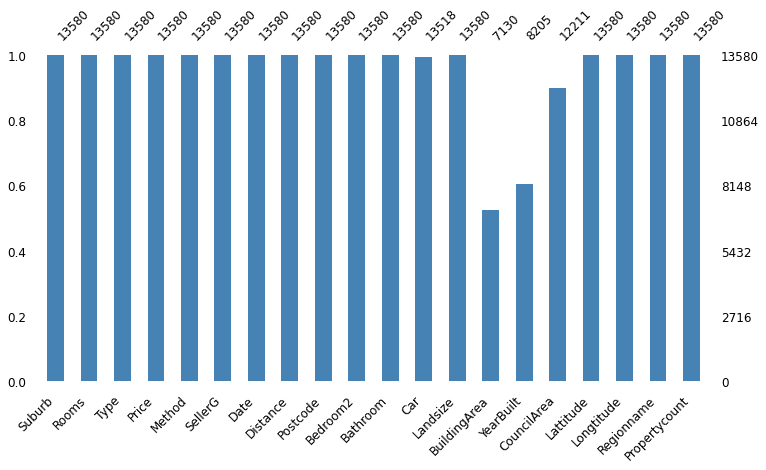

In [51]:
msno.bar(df, figsize=(12, 6), fontsize=12, color='steelblue');

In [52]:
df = df.drop(['BuildingArea', 'YearBuilt'], axis=1)

#### Eliminamos la variable `Bedroom2`

In [53]:
pd.crosstab(df.Bedroom2, df.Rooms)

Rooms,1,2,3,4,5,6,7,8,10
Bedroom2,,,,,,,,,
0.0,0,5,8,3,0,0,0,0,0
1.0,663,21,5,2,0,0,0,0,0
2.0,16,3539,162,19,1,0,0,0,0
3.0,2,74,5626,175,18,1,0,0,0
4.0,0,8,73,2473,42,4,0,1,0
5.0,0,1,5,15,531,2,2,0,0
6.0,0,0,0,0,2,59,0,2,0
7.0,0,0,0,0,1,1,8,0,0
8.0,0,0,0,0,1,0,0,4,0


In [54]:
df = df.drop(['Bedroom2'], axis=1)

#### Imputamos la variable `Bathroom`

In [55]:
pd.crosstab(df.Bathroom, df.Rooms)

Rooms,1,2,3,4,5,6,7,8,10
Bathroom,,,,,,,,,
0.0,1,19,11,3,0,0,0,0,0
1.0,674,3117,3250,452,17,2,0,0,0
2.0,6,504,2459,1720,260,20,3,2,0
3.0,0,8,153,469,244,35,5,2,1
4.0,0,0,5,41,47,9,2,2,0
5.0,0,0,1,2,25,0,0,0,0
6.0,0,0,2,0,2,1,0,0,0
7.0,0,0,0,0,1,0,0,1,0
8.0,0,0,0,1,0,0,0,1,0


In [56]:
df.loc[df.Bathroom == 0, 'Bathroom'] = 1

#### Imputamos la variable `Car`

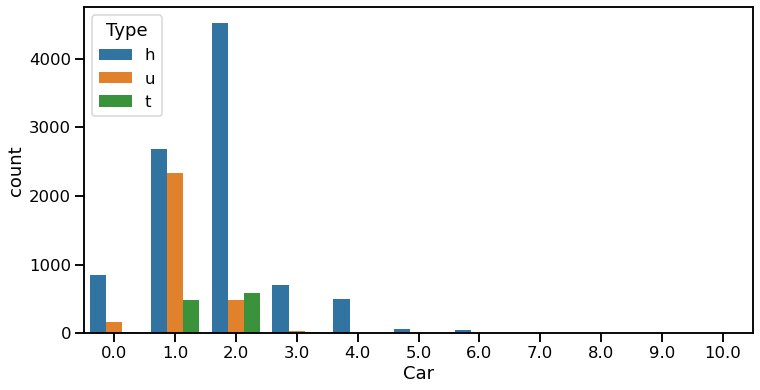

In [57]:
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x='Car', hue='Type');

In [58]:
df.Car.fillna(value=0, inplace=True)

#### Agrupamos la variable `Regionname`

In [59]:
# Conteo de valores
df.Regionname.value_counts()\
  .reset_index()\
  .rename(columns={'index': 'Region',
                   'Regionname': 'Count'
                  }
         )

,Region,Count
0,Southern Metropolitan,4695
1,Northern Metropolitan,3890
2,Western Metropolitan,2948
3,Eastern Metropolitan,1471
4,South-Eastern Metropolitan,450
5,Eastern Victoria,53
6,Northern Victoria,41
7,Western Victoria,32


In [60]:
df.loc[df.Regionname == 'Eastern Victoria', 'Regionname'] = 'Victoria'
df.loc[df.Regionname == 'Northern Victoria', 'Regionname'] = 'Victoria'
df.loc[df.Regionname == 'Western Victoria', 'Regionname'] = 'Victoria'

In [61]:
# Conteo de valores
df.Regionname.value_counts()\
  .reset_index()\
  .rename(columns={'index': 'Region',
                   'Regionname': 'Count'
                  }
         )

,Region,Count
0,Southern Metropolitan,4695
1,Northern Metropolitan,3890
2,Western Metropolitan,2948
3,Eastern Metropolitan,1471
4,South-Eastern Metropolitan,450
5,Victoria,126


#### Agrupamos la variable `Date`

In [62]:
df.Date = pd.to_datetime(df.Date).dt.to_period('Q')

In [63]:
df.Date.value_counts()

2017Q3    2693
2017Q2    2521
2016Q3    2180
2016Q2    1838
2016Q4    1820
2017Q1    1521
2017Q4     509
2016Q1     498
Freq: Q-DEC, Name: Date, dtype: int64

In [64]:
# Copiamos nuestro dataset (para visualizarlo)
data = df[['Date', 'Price']].copy()

data.Date = pd.to_datetime(data.Date.dt.strftime('%YQ%q'))

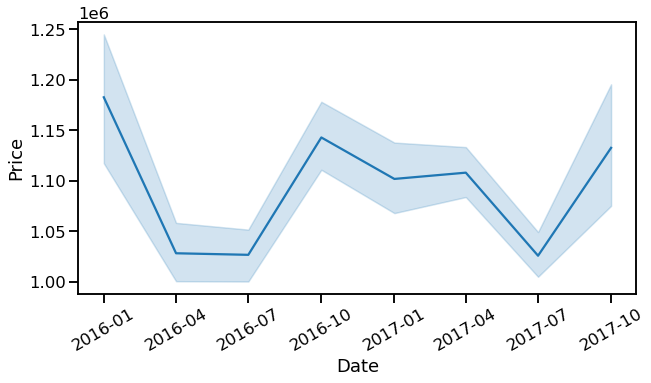

In [65]:
# Visualizamos la distribución
fig = plt.figure(figsize=(10, 5))

sns.lineplot(data=data, x='Date', y='Price')

plt.xticks(rotation=30);

#### Agrupamos la variable `SellerG`

In [66]:
df.SellerG.nunique()

268

In [67]:
# Conteo de valores
data = df.SellerG.value_counts()\
         .reset_index()\
         .rename(columns={'index': 'Seller',
                          'SellerG': 'Count'
                         }
                )

data

,Seller,Count
0,Nelson,1565
1,Jellis,1316
2,hockingstuart,1167
3,Barry,1011
4,Ray,701
...,...,...
263,hockingstuart/Barry,1
264,Tiernan's,1
265,Direct,1
266,Ash,1


In [156]:
lonely_seller = data[data.Count == 1].Seller

In [157]:
df.SellerG.replace(to_replace=lonely_seller.values, value='Others', inplace=True)

In [158]:
df.SellerG.nunique()

191

In [159]:
df[df.SellerG == 'Others'].head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
55,Airport West,241 Parer Rd,5,h,755000.0,PI,Others,14/05/2016,13.5,3042.0,...,2.0,2.0,596.0,NaN,NaN,Moonee Valley,-37.7248,144.8699,Western Metropolitan,3464.0
512,Balwyn,129 Gordon St,3,h,2200000.0,S,Others,3/12/2016,9.7,3103.0,...,3.0,2.0,651.0,266.0,NaN,Boroondara,-37.8085,145.0764,Southern Metropolitan,5682.0
622,Balwyn North,41 Helston St,4,h,1800000.0,VB,Others,10/12/2016,9.2,3104.0,...,2.0,4.0,587.0,165.0,1960.0,Boroondara,-37.7841,145.0953,Southern Metropolitan,7809.0


### Ejercicio 1.3

In [131]:
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude',
]
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [160]:
airbnb_df.head(3)

,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0


In [133]:
airbnb_df.columns

Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude', 'price',
       'weekly_price', 'monthly_price'],
      dtype='object')

<Figure size 720x432 with 0 Axes>

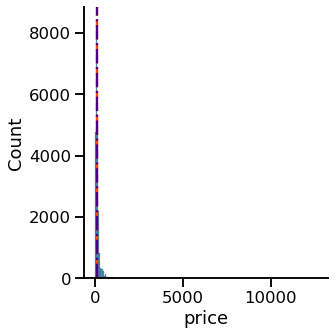

In [161]:
plt.figure(figsize=(10, 6))

sns.displot(airbnb_df, x='price', bins=200)

plt.axvline(airbnb_df.price.mean(), color='orangered', linestyle='--', label='Media')
plt.axvline(airbnb_df.price.median(), color='indigo', linestyle='-.', label='Mediana')

In [162]:
airbnb_df.describe()

,latitude,longitude,price,weekly_price,monthly_price
count,22895.000000,22895.000000,22895.000000,2524.000000,1891.000000
mean,-37.826827,145.008457,148.004368,906.976228,3234.346906
std,0.066747,0.127711,210.883253,821.223782,2808.092144
min,-38.224427,144.484326,0.000000,91.000000,400.000000
25%,-37.852665,144.957692,71.000000,450.000000,1700.000000
50%,-37.817855,144.978402,111.000000,750.000000,2800.000000
75%,-37.803176,145.013441,165.000000,1066.000000,3912.500000
max,-37.482595,145.839127,12624.000000,11536.000000,54258.000000


In [163]:
#Filtramos del dataset de Airbnb las publicaciones de la ciudad de Melbourne
abnb_df = airbnb_df[airbnb_df.city == "Melbourne"].copy()
abnb_df.describe()

,latitude,longitude,price,weekly_price,monthly_price
count,7368.000000,7368.000000,7368.000000,566.000000,477.000000
mean,-37.814019,144.958801,154.134501,972.825088,3514.953878
std,0.009691,0.010258,171.724547,579.317709,1864.267827
min,-37.850536,144.914484,0.000000,140.000000,550.000000
25%,-37.819765,144.953590,90.000000,600.000000,2400.000000
50%,-37.814300,144.959365,127.000000,880.000000,3333.000000
75%,-37.808897,144.964406,169.000000,1200.000000,4200.000000
max,-37.776555,144.990323,9000.000000,5407.000000,15513.000000


In [164]:
print(f"El dataset Airbnb posee {airbnb_df.zipcode.nunique()} de códigos postales únicos")
print(f"El dataset original posee {df.Postcode.nunique()} de códigos postales únicos")

El dataset Airbnb posee 463 de códigos postales únicos
El dataset original posee 198 de códigos postales únicos


In [194]:
print(df.Postcode.value_counts(sort=True))

3073.0    359
3020.0    306
3121.0    292
3040.0    290
3046.0    284
         ... 
3775.0      1
3765.0      1
3115.0      1
3431.0      1
3756.0      1
Name: Postcode, Length: 198, dtype: int64


In [182]:
df.check = airbnb_df.zipcode.isin(df.Postcode)
print(df.check.value_counts())

True     13651
False     9244
Name: zipcode, dtype: int64


In [173]:
dffalse = df[df.check == False]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [218]:
airbnb_df.groupby(["zipcode", "price"]).mean()

latitude   longitude  weekly_price  monthly_price
zipcode  price                                                    
2010.0   40    -37.884721  145.062267           NaN            NaN
2134.0   50    -37.799973  144.976898           NaN            NaN
2582.0   104   -37.629926  144.948196           NaN            NaN
3000.0   0     -37.807411  144.960711           NaN            NaN
         19    -37.809644  144.967984           NaN            NaN
...                   ...         ...           ...            ...
3978     300   -38.148352  145.436676        2202.0         7770.0
         368   -38.077370  145.344602           NaN            NaN
3980     60    -38.224427  145.308933           NaN            NaN
VIC      150   -37.839305  144.992317           NaN            NaN
VIC 3161 195   -37.870839  145.019535           NaN            NaN

[10102 rows x 4 columns]

In [216]:
a = airbnb_df[airbnb_df.zipcode == 39]
a.describe()

,latitude,longitude,price,weekly_price,monthly_price
count,26.000000,26.000000,26.000000,0.0,0.0
mean,-38.099310,145.285754,103.076923,NaN,NaN
std,0.016648,0.032073,79.088772,NaN,NaN
min,-38.140309,145.196379,40.000000,NaN,NaN
25%,-38.110977,145.267012,50.000000,NaN,NaN
50%,-38.097391,145.290138,72.000000,NaN,NaN
75%,-38.086484,145.303299,147.000000,NaN,NaN
max,-38.076097,145.330551,341.000000,NaN,NaN


In [198]:
#hay que agrupar por el grouby mean! despues lo sigo... 
(airbnb_df.zipcode == 3067).value_counts()

False    22738
True       157
Name: zipcode, dtype: int64

In [197]:
(df.Postcode == 3067).value_counts()

False    13524
True        56
Name: Postcode, dtype: int64

In [196]:
(dffalse.Postcode == 3067).value_counts()

False    8483
True       41
Name: Postcode, dtype: int64

In [169]:
# Valores Extremos:
# - Podemos quitar los valores outliers conforme al final del trabajo (cuantil con respecto al precio).



# Punto 2.B
# - Analizar variables categóricas y ver de poder agrupar
#   (así como se hizo de manera manual con los valores 'SellerG' = 1)
#   (buscar método para toda categórica, de acuerdo ej. a cuantil, y colocar valores genéricos a ellas).

# Punto 3
# - Ver variables para mergear los datasets melb_df y airbnb_df
# - 'zipcode', 'Suburb', 'Address', 'Latitude' y 'Longitude' aproximada (buscar la cercanía).

## Ejercicio 2: Imputación

1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora el conjunto de datos).

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB.



## Ejercicio 3

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [ ]:
df.to_csv('DataSet/dataset.csv', index=False)